# Deep Learningの基礎知識

# パーセプトロンの基礎

m個の入力層と1個の出力層だけからなるパーセプトロンは以下の図のように表現されます。

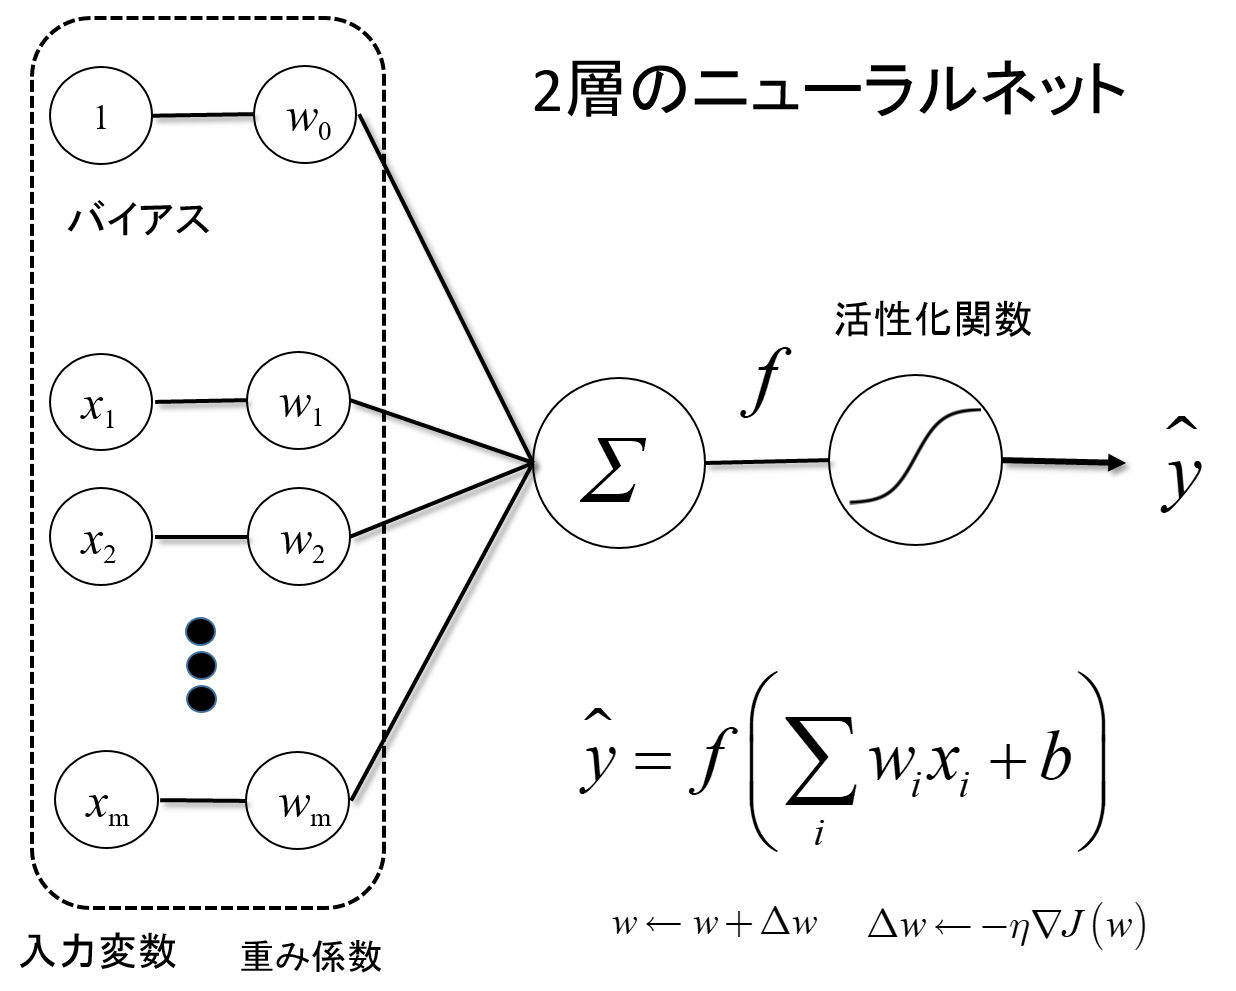

In [1]:
from IPython.display import Image
Image("images/NN-2-layer.jpg",width="500")

# 活性化関数の描画

# Sigmoid Function

$ F(x) = \frac{1}{1+\exp(-ax)} = \frac{\tanh(ax/2)+1}{2}$


In [2]:
# ライブラリのインポート
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


In [3]:
def sigmoid(inputs):
    """
    Calculate the sigmoid for the give inputs (array)
    :param inputs:
    :return:
    """
    sigmoid_scores = [1 / float(1 + np.exp(- x)) for x in inputs]
    return sigmoid_scores

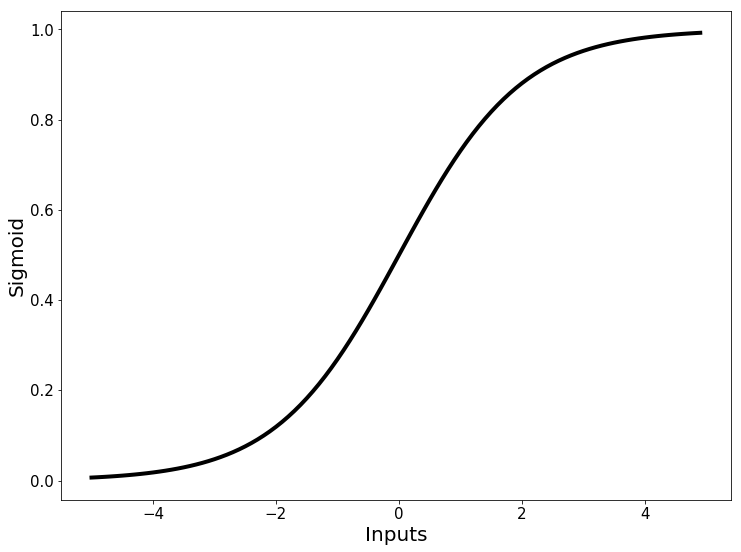

In [4]:
# graph_x = [-3, -1, -0.8, -0.5, -0.3, -0.1, 0, 0.1, 0.3, 0.5, 0.8, 1.0, 3]
graph_x = np.arange(-5,5,0.1)
# print graph_x
graph_y = sigmoid(graph_x)
 
#print "Graph X readings: {}".format(graph_x)
#print "Graph Y readings: {}".format(graph_y)

f_size=20
plt.figure(figsize=(12,9)) 
plt.plot(graph_x, graph_y,color="black", lw=4)
plt.xlabel("Inputs",fontsize=f_size)
plt.ylabel("Sigmoid",fontsize=f_size)
plt.tick_params(labelsize=15)
#line_graph(graph_x, graph_y, "Inputs", "Sigmoid Scores")
plt.savefig('pdf/sigmoid.pdf')
plt.show()



# Softmax関数
Softmax関数は 'n'個の異なるイベントにわたってイベントの確率分布を計算します。

Softmaxでは、出力される確率の範囲が0〜1で、すべての確率の合計は1になります。 
Softmax関数を複数分類モデルに使用すると、各クラスの確率を返し、ターゲットクラスは高い確率を持ちます。

$P(y=j\mid \mathbf{x}) = \frac{e^{\mathbf{x}^\mathsf{T}\mathbf{w}_j}}{\sum_{k=1}^K e^{\mathbf{x}^\mathsf{T}\mathbf{w}_k}}$


In [5]:
def softmax(inputs):
    """
    Calculate the softmax for the give inputs (array)
    :param inputs:
    :return:
    """
    return np.exp(inputs) / float(sum(np.exp(inputs)))

In [6]:
def line_graph(x, y, x_title, y_title, fname):
    """
    Draw line graph with x and y values
    :param x:
    :param y:
    :param x_title:
    :param y_title:
    :param fname: file name
    :return:
    """
    f_size=20
    plt.figure(figsize=(12,9)) 
    plt.plot(x, y, lw=4, color="black")
    plt.xlabel(x_title,fontsize=f_size)
    plt.ylabel(y_title,fontsize=f_size)
    plt.tick_params(labelsize=15)
    plt.savefig(fname)
    plt.show()

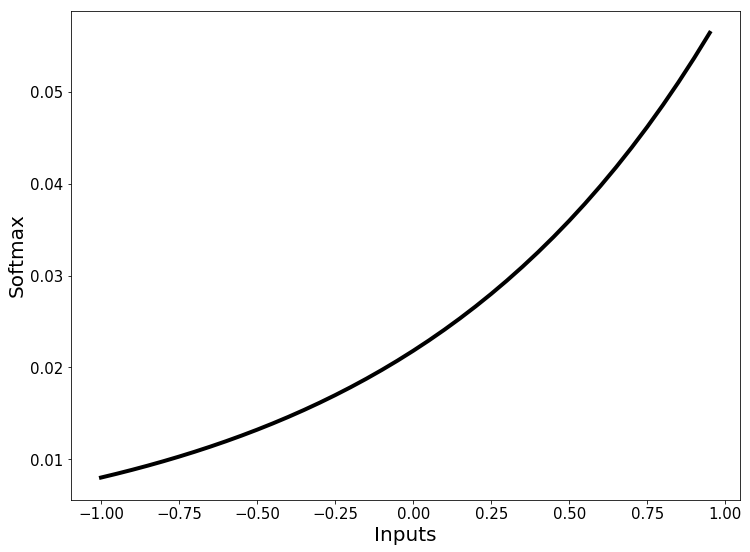

In [7]:
graph_x = np.arange(-1,1,0.05)
graph_y = softmax(graph_x)
 
#print "Graph X readings: {}".format(graph_x)
#print "Graph Y readings: {}".format(graph_y)
 
line_graph(graph_x, graph_y, "Inputs", "Softmax", 'pdf/softmax.pdf')


# ReLU関数

In [8]:
def relu(x):
    len = x.size
    result = np.linspace(0,len-1,num=len,dtype=float)
    for i in range(result.size):
        if (x[i] > 0.0):
            result[i] = x[i]
        else:
            result[i] = 0.0
    return result

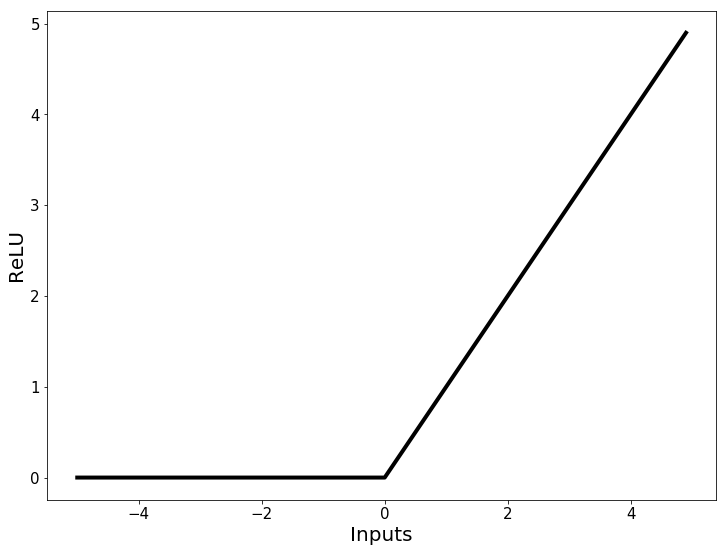

In [9]:
graph_x = np.arange(-5,5,0.1)
graph_y = relu(graph_x)

line_graph(graph_x, graph_y, "Inputs", "ReLU", 'pdf/ReLU.pdf')

In [10]:
def tanh(inputs):
    """
    Calculate the tanh of the give inputs (array)
    :param inputs:
    :return:
    """
    tanh_scores = [np.tanh(x) for x in inputs]
    return tanh_scores

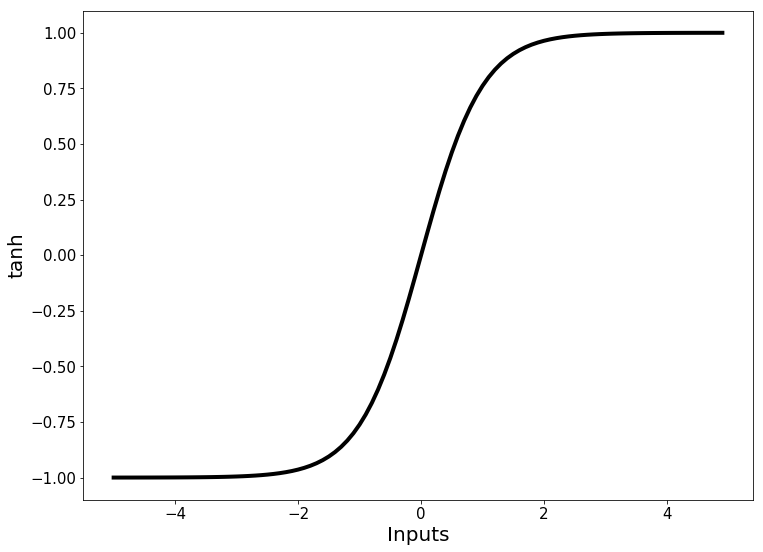

In [11]:
graph_x = np.arange(-5,5,0.1)
graph_y = tanh(graph_x)
 
f_size=20
plt.figure(figsize=(12,9)) 
plt.plot(graph_x, graph_y,color="black", lw=4)
plt.xlabel("Inputs",fontsize=f_size)
plt.ylabel("tanh",fontsize=f_size)
plt.tick_params(labelsize=15)

plt.savefig('pdf/tanh.pdf')
plt.show()


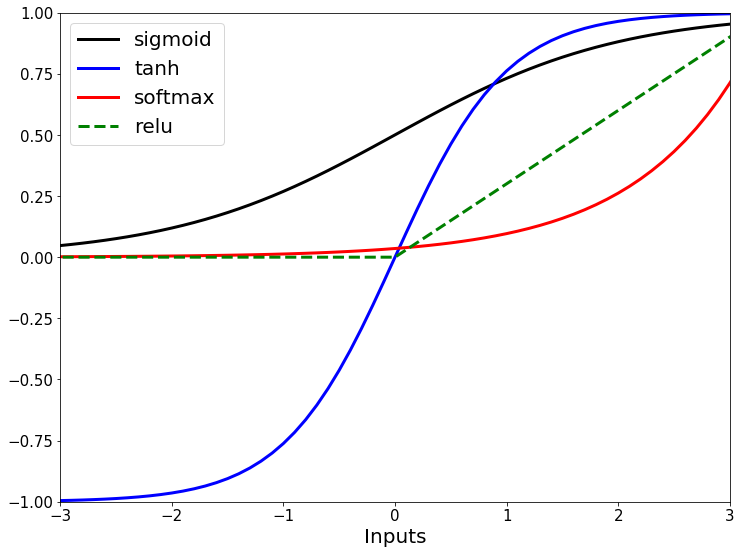

In [12]:
# All together

graph_x = np.arange(-5,5,0.1)
graph_sigmoid = sigmoid(graph_x)
graph_tanh = tanh(graph_x)
graph_softmax = 50*softmax(graph_x)
graph_relu = relu(0.3*graph_x)

f_size=20
plt.figure(figsize=(12,9)) 
plt.plot(graph_x, graph_sigmoid, color="black", linestyle='-', lw=3)
plt.plot(graph_x, graph_tanh, color="b", linestyle='-', lw=3)
plt.plot(graph_x, graph_softmax, color="r", linestyle='-', lw=3)
plt.plot(graph_x, graph_relu, color="g", linestyle='--', lw=3)
plt.xlabel("Inputs",fontsize=f_size)
# plt.ylabel("tanh",fontsize=f_size)
plt.tick_params(labelsize=15)
plt.xlim(-3,3)
plt.ylim(-1,1)
plt.legend(['sigmoid', 
            'tanh',
            'softmax',
            'relu'], loc='best', fontsize=20)    
plt.savefig('pdf/activation_functions.pdf')
plt.show()